In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [6]:
path = '/content/drive/MyDrive/DataForSudy/airquality_simple.csv'
data = pd.read_csv(path)

In [7]:
# 상관관계 확인
data.corr(numeric_only=True)

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


<Axes: >

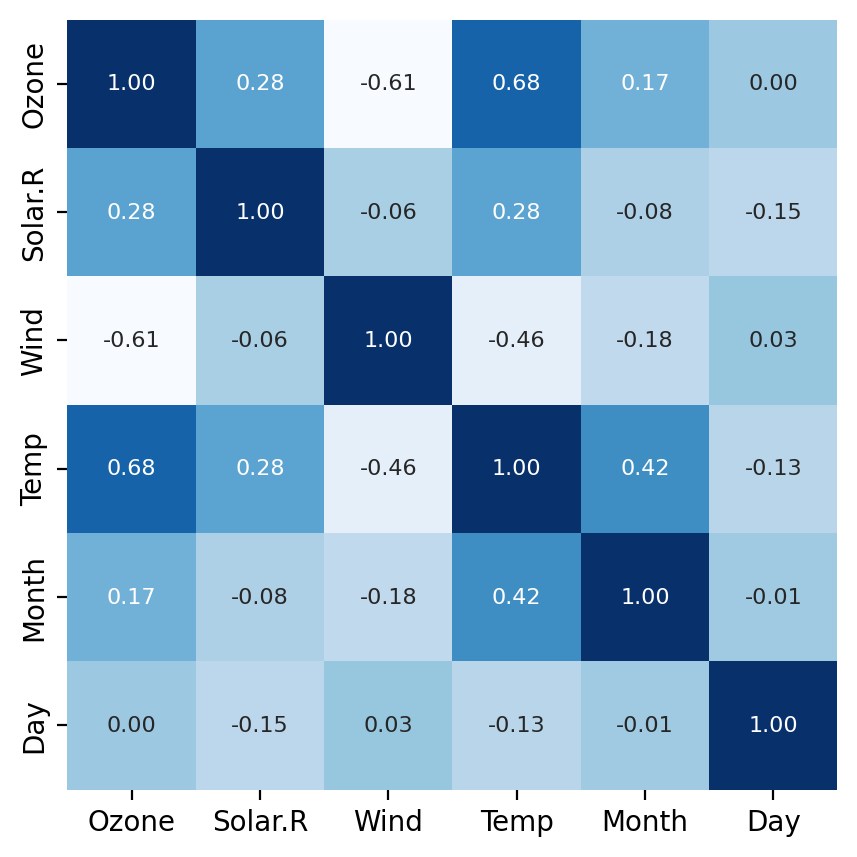

In [8]:
# 상관관계 시각화
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(),
            annot=True,
            cmap='Blues',
            fmt='.2f',
            cbar=False,
            square=True,
            annot_kws={'size': 8})

In [9]:
# 결측치 확인
data.isnull().sum()

,0
Ozone,0
Solar.R,7
Wind,0
Temp,0
Month,0
Day,0


In [10]:
# 전날 값으로 결측치 채우기
data.ffill(inplace=True)

# 확인
data.isnull().sum()

,0
Ozone,0
Solar.R,0
Wind,0
Temp,0
Month,0
Day,0


In [11]:
# 필요없는 변수 제거
drop_cols = ['Month', 'Day']
data.drop(columns=drop_cols, inplace=True)

# 확인
data.head()

,Ozone,Solar.R,Wind,Temp
0,41,190.0,7.4,67
1,36,118.0,8.0,72
2,12,149.0,12.6,74
3,18,313.0,11.5,62
4,19,313.0,14.3,56


In [13]:
# target 확인
target = 'Ozone'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [14]:
# 학습용, 평가용 데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [15]:
# 모델링
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [17]:
# 회귀 성능 평가

# MAE (Mean Absolute Error)
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test, y_pred))

# MSE (Mean Squared Error)
from sklearn.metrics import mean_squared_error
print('MSE:', mean_squared_error(y_test, y_pred))

# RMSE (Root Mean Squared Error)
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

# MAPE (Mean Absolute Percentage Error)
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

# R2-Score
from sklearn.metrics import r2_score
print('R2-Score:', r2_score(y_test, y_pred))

MAE: 13.976843190385708
MSE: 341.6788740668188
RMSE: 18.48455771899395
MAPE: 0.47185976988482575
R2-Score: 0.5744131358040063
